## Part 1: Reducing Data

### 1.1 Median Bias Frame

In [1]:
# start by importing the necessities
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt

In [2]:
import glob
biases = glob.glob('/Users/wanyan/Desktop/229Data/biases/*.fit')
biases

['/Users/wanyan/Desktop/229Data/biases/bias03.fit',
 '/Users/wanyan/Desktop/229Data/biases/bias02.fit',
 '/Users/wanyan/Desktop/229Data/biases/bias14.fit',
 '/Users/wanyan/Desktop/229Data/biases/bias01.fit',
 '/Users/wanyan/Desktop/229Data/biases/bias15.fit',
 '/Users/wanyan/Desktop/229Data/biases/bias11.fit',
 '/Users/wanyan/Desktop/229Data/biases/bias05.fit',
 '/Users/wanyan/Desktop/229Data/biases/bias04.fit',
 '/Users/wanyan/Desktop/229Data/biases/bias10.fit',
 '/Users/wanyan/Desktop/229Data/biases/bias06.fit',
 '/Users/wanyan/Desktop/229Data/biases/bias12.fit',
 '/Users/wanyan/Desktop/229Data/biases/bias13.fit',
 '/Users/wanyan/Desktop/229Data/biases/bias07.fit',
 '/Users/wanyan/Desktop/229Data/biases/bias09.fit',
 '/Users/wanyan/Desktop/229Data/biases/bias08.fit']

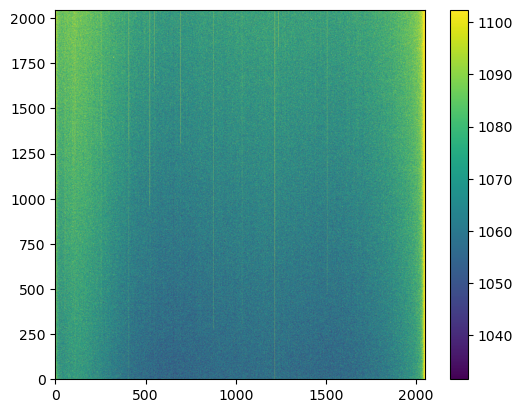

In [3]:
# Take a look at the data
bias1 = fits.getdata(biases[0])
med_bias1 = np.median(bias1)
std_bias1 = np.std(bias1)

plt.imshow(bias1, origin='lower', vmin=(med_bias1-std_bias1), vmax=(med_bias1+std_bias1))
plt.colorbar()

In [4]:
# The combined median bias frame
bias_timestream = [fits.getdata(x) for x in biases]
median_bias = np.median(bias_timestream, axis=0)

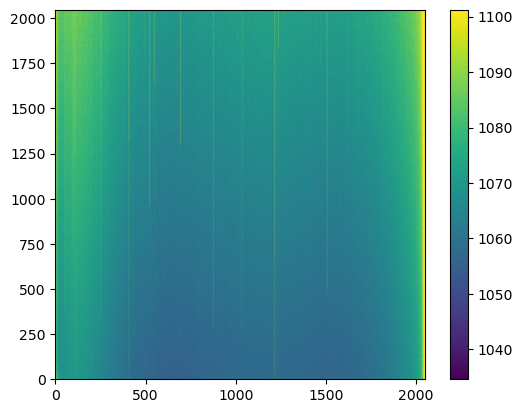

In [5]:
# Take a look at the median bias frame
plt.imshow(median_bias, origin='lower', vmin=(median_bias.mean()-median_bias.std()), vmax=(median_bias.mean()+median_bias.std()))
plt.colorbar()

In [6]:
BIAS = median_bias

### 1.2 Dark Frame

my exposure time is 45s, so I apply the dark frame with exposure time = 45s

In [7]:
darks = glob.glob('/Users/wanyan/Desktop/229Data/darks/dark45s*.fit')
darks

['/Users/wanyan/Desktop/229Data/darks/dark45s05.fit',
 '/Users/wanyan/Desktop/229Data/darks/dark45s04.fit',
 '/Users/wanyan/Desktop/229Data/darks/dark45s01.fit',
 '/Users/wanyan/Desktop/229Data/darks/dark45s03.fit',
 '/Users/wanyan/Desktop/229Data/darks/dark45s02.fit']

In [8]:
darks_frms = [fits.getdata(x) for x in darks]
median_dark = np.median(darks_frms, axis=0)
stddev_dark = np.std(darks_frms, axis=0)

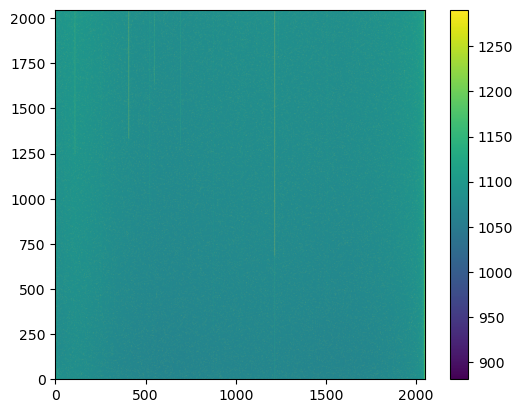

In [9]:
# Take a look at the median dark frame
plt.imshow(median_dark, origin='lower', vmin=(median_dark.mean()-median_dark.std()), vmax=(median_dark.mean()+median_dark.std()))
plt.colorbar()

In [10]:
# The dark frame contains the bias, so I subtract the bias
DARKS = median_dark - BIAS

In [11]:
# delete the timestream

del darks_frms
del bias_timestream

### 1.3 Flat Field Correction

my observation used three filters: H_alpha, S II, and O III. So I have to calculate the flat fields for them seperately

#### H_alpha Flat Field

In [12]:
Haflats = glob.glob('/Users/wanyan/Desktop/229Data/flats/flat_Ha*.fit')
Haflats

['/Users/wanyan/Desktop/229Data/flats/flat_Ha05.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_Ha11.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_Ha10.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_Ha04.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_Ha06.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_Ha07.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_Ha03.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_Ha02.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_Ha01.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_Ha09.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_Ha08.fit']

In [13]:
Haflat_timestream = [fits.getdata(x)for x in Haflats]
median_Haflat = np.median(Haflat_timestream, axis=0)
del Haflat_timestream

In [14]:
bias_subtracted_Haflat = median_Haflat - BIAS

Haflat_mean = np.mean(bias_subtracted_Haflat)
normalized_mean_Haflat = bias_subtracted_Haflat / Haflat_mean

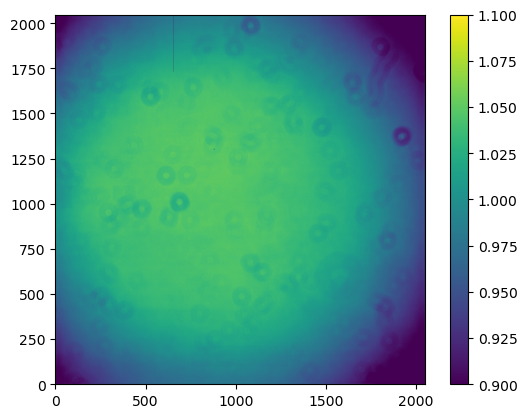

In [15]:
# take a look at the flat field
plt.imshow(normalized_mean_Haflat, origin='lower', vmin=0.9, vmax=1.1)
plt.colorbar()

In [16]:
HaFLAT = normalized_mean_Haflat

#### S II Flat Field

In [17]:
S2flats = glob.glob('/Users/wanyan/Desktop/229Data/flats/flat_S2*.fit')
S2flats

['/Users/wanyan/Desktop/229Data/flats/flat_S207.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_S206.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_S204.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_S210.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_S211.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_S205.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_S201.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_S202.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_S203.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_S208.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_S209.fit']

In [18]:
S2flat_timestream = [fits.getdata(x)for x in S2flats]
median_S2flat = np.median(S2flat_timestream, axis=0)
del S2flat_timestream

In [19]:
bias_subtracted_S2flat = median_S2flat - BIAS

S2flat_mean = np.mean(bias_subtracted_S2flat)
normalized_mean_S2flat = bias_subtracted_S2flat / S2flat_mean

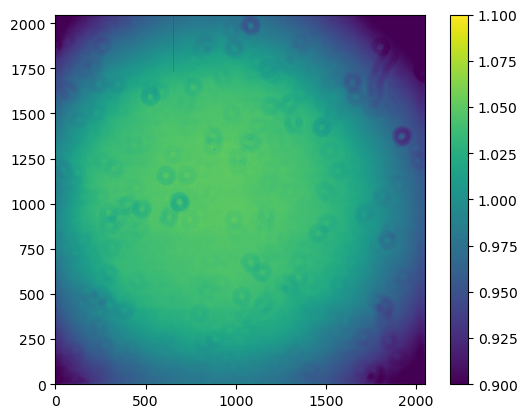

In [20]:
# take a look at the flat field
plt.imshow(normalized_mean_S2flat, origin='lower', vmin=0.9, vmax=1.1)
plt.colorbar()

In [21]:
S2FLAT = normalized_mean_S2flat

#### O III Flat Field

In [22]:
O3flats = glob.glob('/Users/wanyan/Desktop/229Data/flats/flat_O3*.fit')
O3flats

['/Users/wanyan/Desktop/229Data/flats/flat_O302.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_O303.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_O301.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_O304.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_O310.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_O311.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_O305.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_O307.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_O306.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_O308.fit',
 '/Users/wanyan/Desktop/229Data/flats/flat_O309.fit']

In [23]:
O3flat_timestream = [fits.getdata(x)for x in O3flats]
median_O3flat = np.median(O3flat_timestream, axis=0)
del O3flat_timestream

In [24]:
bias_subtracted_O3flat = median_O3flat - BIAS

O3flat_mean = np.mean(bias_subtracted_O3flat)
normalized_mean_O3flat = bias_subtracted_O3flat / O3flat_mean

In [25]:
O3FLAT = normalized_mean_O3flat

### 1.4 Making Corrections

In [26]:
import os

#### 1.4.1 Calibrated H_alpha Band

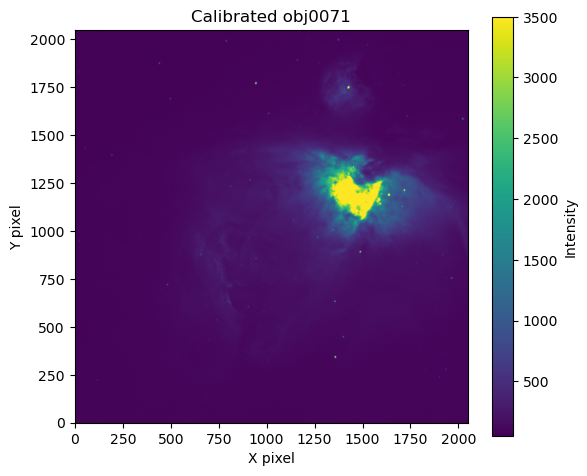

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/Ha_reduced/M42_Ha_71.fits


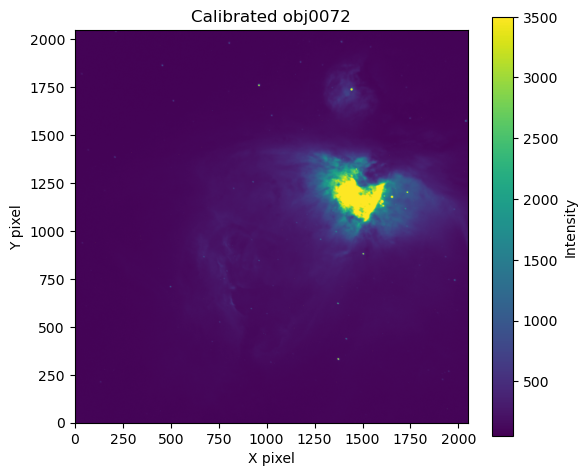

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/Ha_reduced/M42_Ha_72.fits


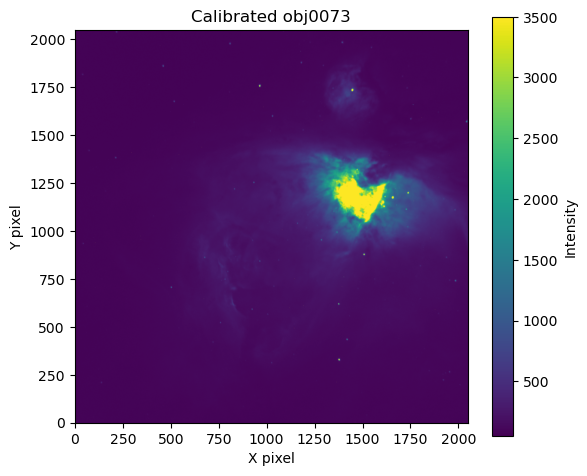

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/Ha_reduced/M42_Ha_73.fits


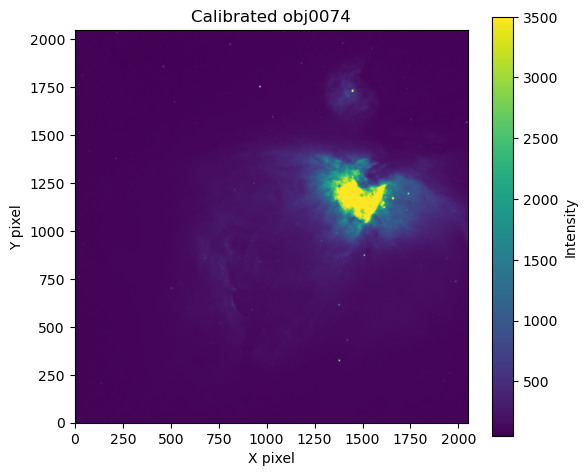

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/Ha_reduced/M42_Ha_74.fits


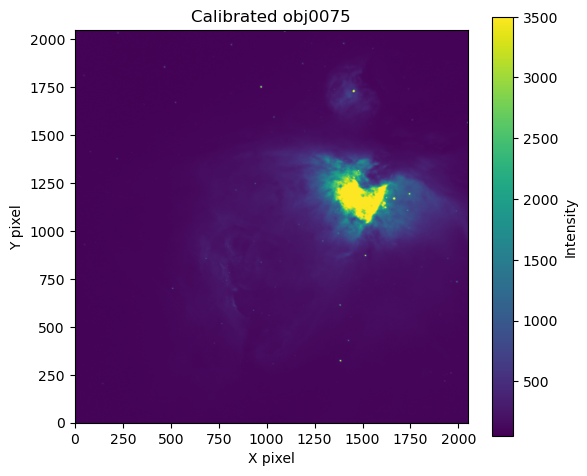

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/Ha_reduced/M42_Ha_75.fits


In [27]:
base_path = '/Users/wanyan/Desktop/229Data/Aolun/raw/'
save_path = os.path.join(base_path, 'Ha_reduced')
os.makedirs(save_path, exist_ok=True)

# Object numbers 71-75
obj_numbers = [i for i in range(71, 76)]

data_dict = {}

# Load all object files
for num in obj_numbers:
    filename = f'{base_path}000003{num}.M 42.fit'
    with fits.open(filename) as hdul:
        data_dict[num] = hdul[0].data
        header = hdul[0].header

# Calibrate and save each
for num in obj_numbers:
    # Perform calibration
    calibrated = (
        (data_dict[num] - BIAS - DARKS) / HaFLAT
    )

    # Plot them
    plt.figure(figsize=(6, 5))
    plt.imshow(calibrated, origin='lower', vmin=50, vmax=3500)
    plt.colorbar(label='Intensity')
    plt.title(f'Calibrated obj00{num}')
    plt.xlabel('X pixel')
    plt.ylabel('Y pixel')
    plt.tight_layout()
    plt.show()

    # --- Save calibrated FITS file ---
    save_filename = os.path.join(save_path, f'M42_Ha_{num}.fits')
    fits.writeto(save_filename, calibrated, header, overwrite=True)

    print(f'Saved calibrated file: {save_filename}')

#### 1.4.2 Calibrated S II Band

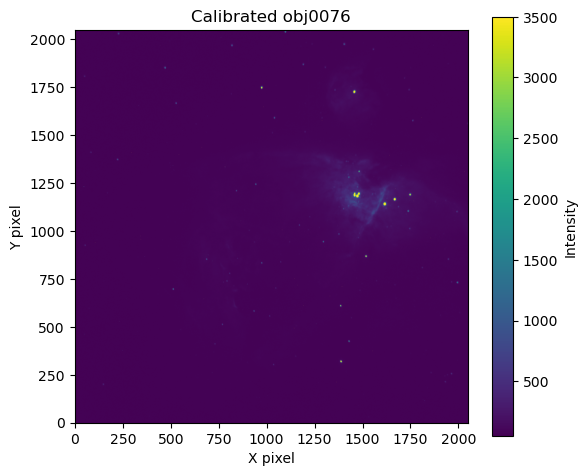

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/S2_reduced/M42_S2_76.fits


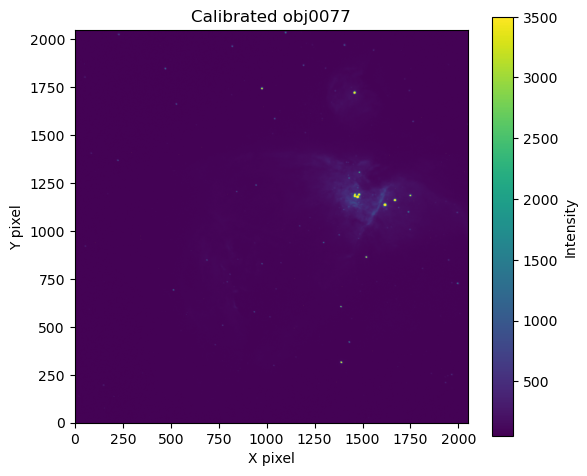

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/S2_reduced/M42_S2_77.fits


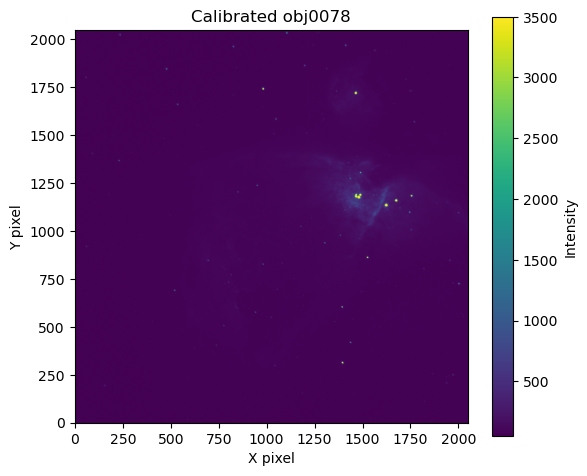

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/S2_reduced/M42_S2_78.fits


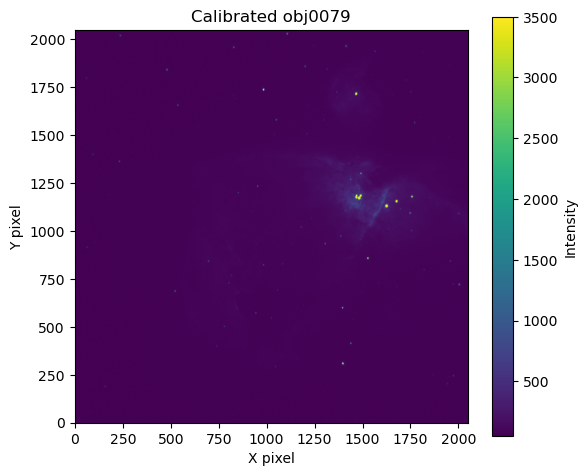

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/S2_reduced/M42_S2_79.fits


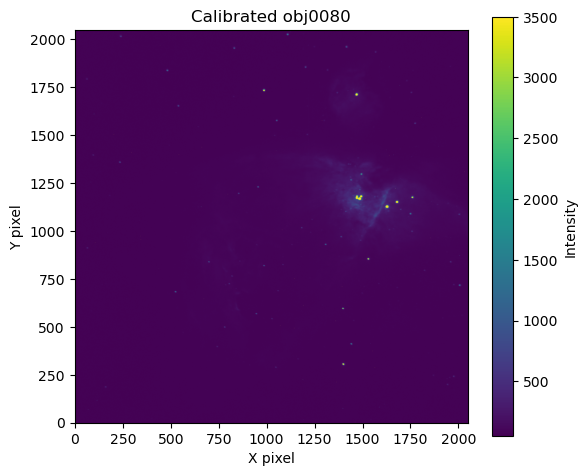

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/S2_reduced/M42_S2_80.fits


In [28]:
base_path = '/Users/wanyan/Desktop/229Data/Aolun/raw/'
save_path = os.path.join(base_path, 'S2_reduced')
os.makedirs(save_path, exist_ok=True)

# Object numbers 76-81
obj_numbers = [i for i in range(76, 81)]

data_dict = {}

# Load all object files
for num in obj_numbers:
    filename = f'{base_path}000003{num}.M 42.fit'
    with fits.open(filename) as hdul:
        data_dict[num] = hdul[0].data
        header = hdul[0].header

# Calibrate and save each
for num in obj_numbers:
    # Perform calibration
    calibrated = (
        (data_dict[num] - BIAS - DARKS) / S2FLAT
    )

    # Plot them
    plt.figure(figsize=(6, 5))
    plt.imshow(calibrated, origin='lower', vmin=50, vmax=3500)
    plt.colorbar(label='Intensity')
    plt.title(f'Calibrated obj00{num}')
    plt.xlabel('X pixel')
    plt.ylabel('Y pixel')
    plt.tight_layout()
    plt.show()

    # --- Save calibrated FITS file ---
    save_filename = os.path.join(save_path, f'M42_S2_{num}.fits')
    fits.writeto(save_filename, calibrated, header, overwrite=True)

    print(f'Saved calibrated file: {save_filename}')

#### 1.4.3 Calibrated O III Band

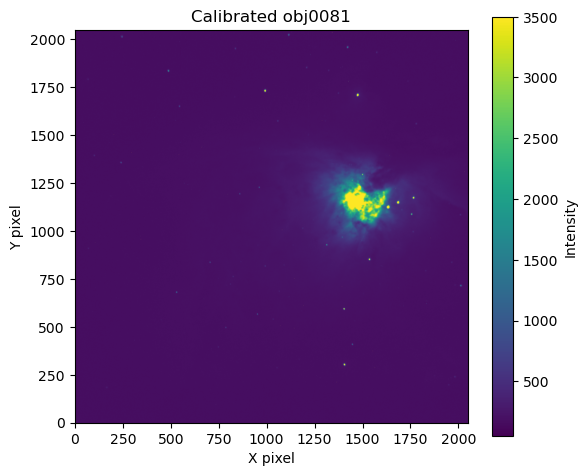

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/O3_reduced/M42_O3_81.fits


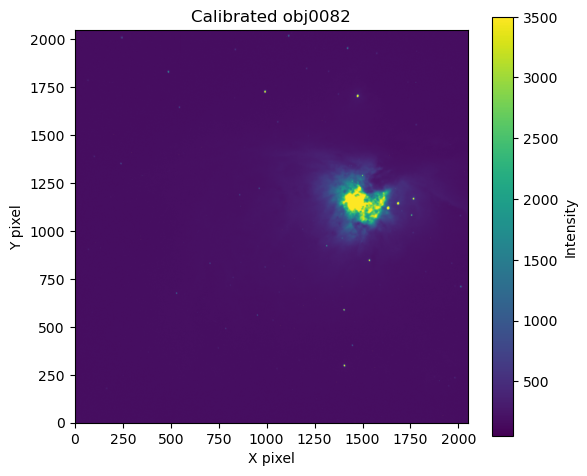

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/O3_reduced/M42_O3_82.fits


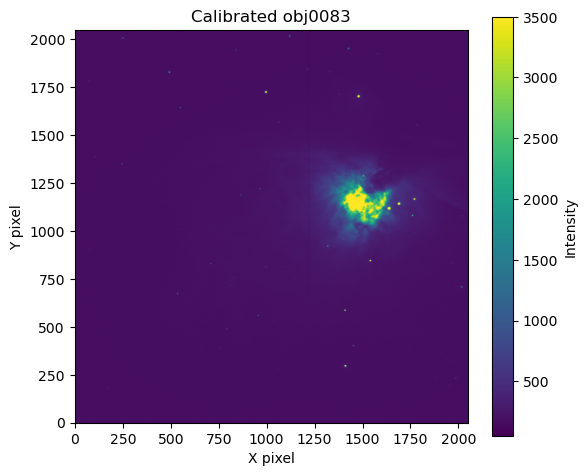

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/O3_reduced/M42_O3_83.fits


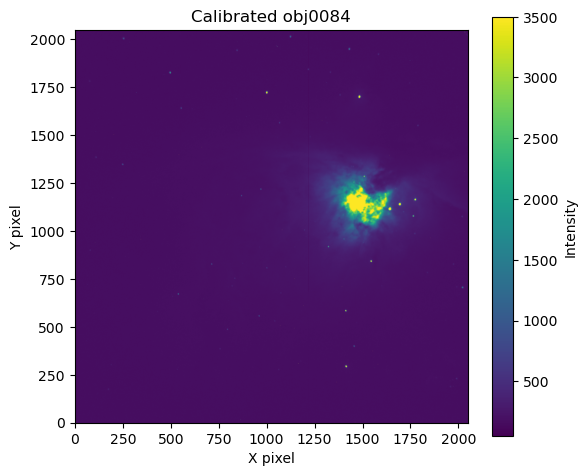

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/O3_reduced/M42_O3_84.fits


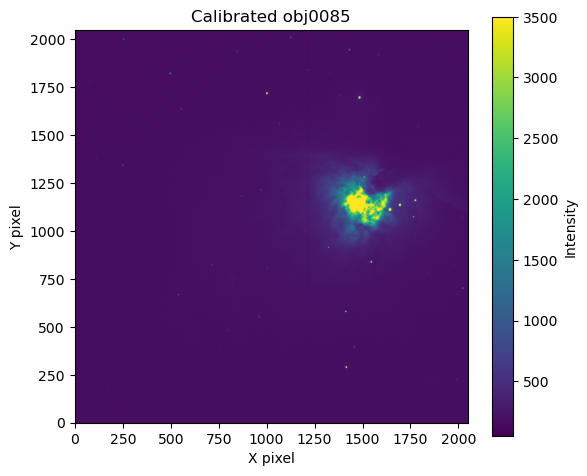

Saved calibrated file: /Users/wanyan/Desktop/229Data/Aolun/raw/O3_reduced/M42_O3_85.fits


In [29]:
base_path = '/Users/wanyan/Desktop/229Data/Aolun/raw/'
save_path = os.path.join(base_path, 'O3_reduced')
os.makedirs(save_path, exist_ok=True)

# Object numbers 81-85
obj_numbers = [i for i in range(81, 86)]

data_dict = {}

# Load all object files
for num in obj_numbers:
    filename = f'{base_path}000003{num}.M 42.fit'
    with fits.open(filename) as hdul:
        data_dict[num] = hdul[0].data
        header = hdul[0].header

# Calibrate and save each
for num in obj_numbers:
    # Perform calibration
    calibrated = (
        (data_dict[num] - BIAS - DARKS) / O3FLAT
    )

    # Plot them
    plt.figure(figsize=(6, 5))
    plt.imshow(calibrated, origin='lower', vmin=50, vmax=3500)
    plt.colorbar(label='Intensity')
    plt.title(f'Calibrated obj00{num}')
    plt.xlabel('X pixel')
    plt.ylabel('Y pixel')
    plt.tight_layout()
    plt.show()

    # --- Save calibrated FITS file ---
    save_filename = os.path.join(save_path, f'M42_O3_{num}.fits')
    fits.writeto(save_filename, calibrated, header, overwrite=True)

    print(f'Saved calibrated file: {save_filename}')

## Part 2 Alignment and Combining Images

### 2.1 Image Shifts

In [99]:
# I am trying to use astroalign, with reference: https://www.quatrope.org/astroalign/
# But that does not worked so well
import astroalign as aa
%matplotlib inline
from astropy.io import ascii
import warnings
import numpy as np

np.random.seed(seed=12)
aa.__version__

'2.6.2'

In [31]:
# Saving to desired path
base_path = '/Users/wanyan/Desktop/229Data/Aolun/raw/Ha_reduced'
save_path = os.path.join('/Users/wanyan/Desktop/229Data/Aolun/', 'Ha_Aligned')
os.makedirs(save_path, exist_ok=True)

# Object numbers 71–75
obj_numbers = [i for i in range(71, 76)]

# Build list of files
file_list = [os.path.join(base_path, f"M42_Ha_{num}.fits") for num in obj_numbers]

# The reference file
ref_file = file_list[0]
ref_data = fits.getdata(ref_file)
#print(f"Using reference frame: {ref_file}")

# save the first aligned file
fits.writeto(
    os.path.join(save_path, f"aligned_{obj_numbers[0]}.fits"),
    ref_data,
    overwrite=True
)

aligned_stack = [ref_data] 

# Align the later files
for f in file_list[1:]:
    print(f"\nAligning: {f}")

    data = fits.getdata(f)

    # I encountered 'Big-endian buffer not supported on little-endian compiler' issue, so I tried to fix it
    if data.dtype.byteorder == '>' or (data.dtype.byteorder == '=' and np.little_endian is False):
        data = data.byteswap().newbyteorder()
    if ref_data.dtype.byteorder == '>' or (ref_data.dtype.byteorder == '=' and np.little_endian is False):
        ref_data = ref_data.byteswap().newbyteorder()

    try:
        aligned, footprint = aa.register(data, ref_data)
        print("Aligned")

        # Save aligned frame
        outname = os.path.join(save_path, f"aligned_{os.path.basename(f)}")
        fits.writeto(outname, aligned, overwrite=True)

        aligned_stack.append(aligned)

    except Exception as e:
        print(f"Cannot Align {f}: {e}")

# Stack the Aligned Files

aligned_stack = np.array(aligned_stack)

# median stack
median_stack = np.median(aligned_stack, axis=0)
fits.writeto(os.path.join(save_path, "Combined_Ha.fits"), median_stack, overwrite=True)

print("\n All Aliged!")


Aligning: /Users/wanyan/Desktop/229Data/Aolun/raw/Ha_reduced/M42_Ha_72.fits
Aligned

Aligning: /Users/wanyan/Desktop/229Data/Aolun/raw/Ha_reduced/M42_Ha_73.fits
Aligned

Aligning: /Users/wanyan/Desktop/229Data/Aolun/raw/Ha_reduced/M42_Ha_74.fits
Aligned

Aligning: /Users/wanyan/Desktop/229Data/Aolun/raw/Ha_reduced/M42_Ha_75.fits
Aligned

 All Aliged!


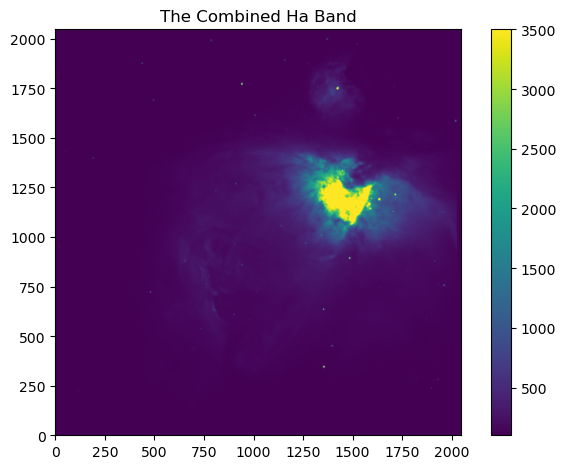

In [32]:
# take a look at the final image
plt.imshow(median_stack, origin='lower', vmin=100, vmax=3500)
plt.title("The Combined Ha Band")
plt.colorbar()
plt.tight_layout()
plt.show()

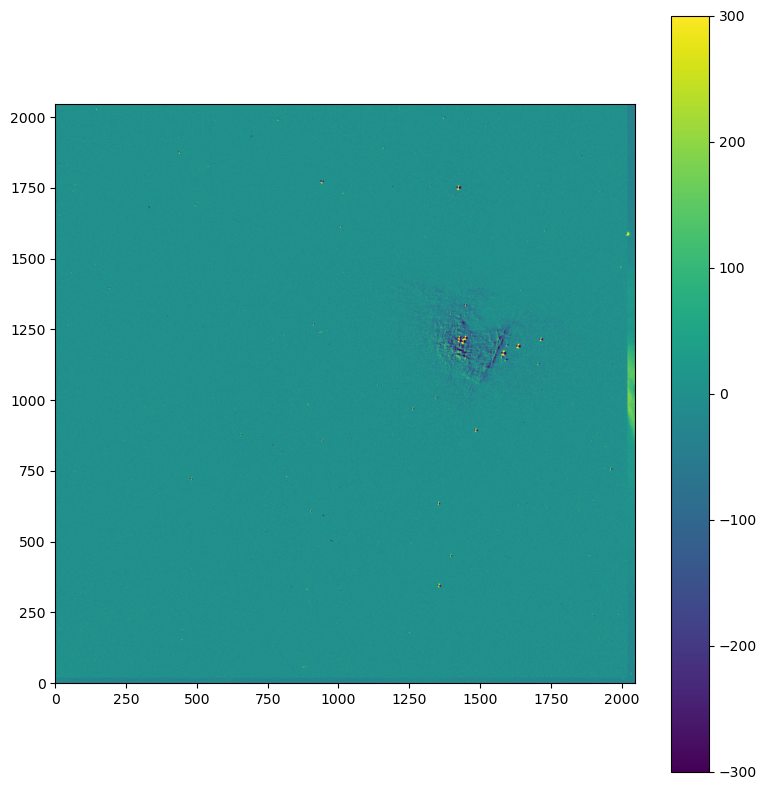

In [33]:
# check my alignment
aligned_path = '/Users/wanyan/Desktop/229Data/Aolun/Ha_Aligned'

# Pick two aligned frames to compare
fileA = os.path.join(aligned_path, "aligned_71.fits")
fileB = os.path.join(aligned_path, "aligned_M42_Ha_75.fits")

A = fits.getdata(fileA)
B = fits.getdata(fileB)

diff = A - B

plt.figure(figsize=(8, 8))
plt.imshow(diff, origin='lower', vmin=-300, vmax=300)
plt.colorbar()
plt.tight_layout()
plt.show()

#### Ha Band

In [74]:
path = '/Users/wanyan/Desktop/229Data/Aolun/raw/Ha_reduced/'
dat_path = path + 'Ha.txt'

# files we need to do the alignment
sdat = ascii.read(dat_path, delimiter=" ") # reads into astropy table object sdat
sdat

<Table length=5>
     name       xsh   ysh 
    str14      int64 int64
-------------- ----- -----
M42_Ha_71.fits     0     0
M42_Ha_72.fits   -12    15
M42_Ha_73.fits   -14    20
M42_Ha_74.fits   -18    20
M42_Ha_75.fits   -20    27

In [75]:
# read in the first image
ffile=fits.open(path+sdat['name'][0])

# determine the image size using the shape function
ysz, xsz = ffile[0].data.shape

# compute the shift needed for each image
xshift = sdat['xsh']
yshift = sdat['ysh']

In [76]:
#make an empty array to collect the big, shifted images
data_stack = []

# notice that we start with image 1! image 0 is the reference image and does not need to be shifted
for i in range(1,nfiles):
    #read in the image
    ffile=fits.open(path+sdat['name'][i])
    fdata=ffile[0].data

    # add NaNs around the edge of the image so we can shift the images without the data wrapping around on itself
    bgim = np.pad(fdata, 100, constant_values=np.nan)

    # shift the image -- make sure the x and y axes are correctly mapped!
    shift_im = np.roll(bgim, (xshift[i],yshift[i]), axis=(1,0))

    # add to the data stack
    data_stack.append(shift_im)

# make the data stack into an array so we can do math with it
data_stack = np.array(data_stack)

In [77]:
imstack = np.nanmedian(data_stack, axis=0)

/var/folders/jt/pmnf348x4bq6l0mthmr86gd00000gn/T/ipykernel_9901/1028748614.py:1: RuntimeWarning: All-NaN slice encountered
  imstack = np.nanmedian(data_stack, axis=0)


In [78]:
print("is all NaN? ", np.isnan(imstack).all())
print("fraction NaN:", np.isnan(imstack).mean())
print("min:", np.nanmin(imstack))
print("max:", np.nanmax(imstack))

print("Image shape:", imstack.shape)

is all NaN?  False
fraction NaN: 0.16192012512506174
min: -188.52884286887226
max: 48528.41178470416
Image shape: (2248, 2248)


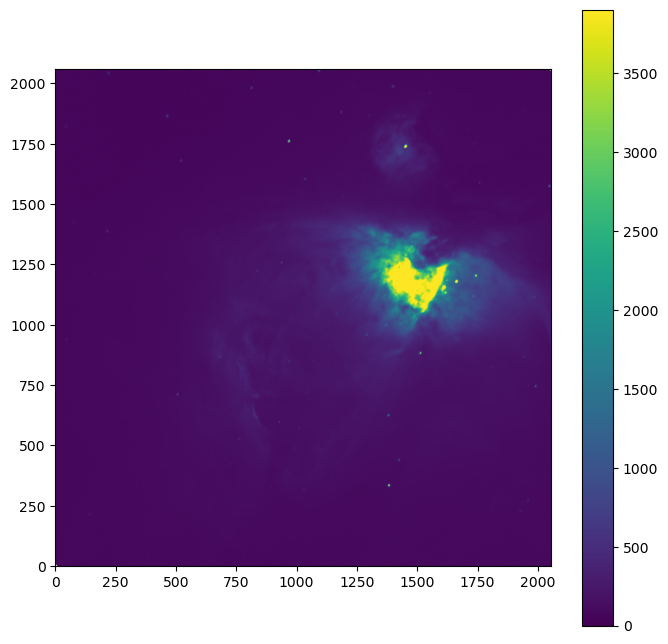

Image shape: (2060, 2056)


In [80]:
imH = imstack

valid_rows = np.any(~np.isnan(imH), axis=1)
valid_cols = np.any(~np.isnan(imH), axis=0)

rmin, rmax = np.where(valid_rows)[0][[0, -1]]
cmin, cmax = np.where(valid_cols)[0][[0, -1]]

trimmed = imH[rmin:rmax+1, cmin:cmax+1]

plt.figure(figsize=(8,8))
plt.imshow(trimmed, origin='lower', vmin = 0, vmax = 3900)
plt.colorbar()
plt.show()

print("Image shape:", trimmed.shape)

In [81]:
save_path = "/Users/wanyan/Desktop/229Data/Aolun/trimmed_Ha.fits"

hdu = fits.PrimaryHDU(trimmed)
hdu.writeto(save_path, overwrite=True)

print(f"Saved trimmed image to: {save_path}")

Saved trimmed image to: /Users/wanyan/Desktop/229Data/Aolun/trimmed_Ha.fits


#### S II Band

In [82]:
path = '/Users/wanyan/Desktop/229Data/Aolun/raw/S2_reduced/'
dat_path = path + 'S2.txt'

# files we need to do the alignment
sdat = ascii.read(dat_path, delimiter=" ") # reads into astropy table object sdat
sdat

<Table length=5>
     name       xsh   ysh 
    str14      int64 int64
-------------- ----- -----
M42_S2_76.fits     0     0
M42_S2_77.fits    -4     2
M42_S2_78.fits    -6     9
M42_S2_79.fits   -11    10
M42_S2_80.fits   -14    13

In [83]:
# read in the first image
ffile=fits.open(path+sdat['name'][0])

# determine the image size using the shape function
ysz, xsz = ffile[0].data.shape

# compute the shift needed for each image
xshift = sdat['xsh']
yshift = sdat['ysh']

In [84]:
#make an empty array to collect the big, shifted images
data_stack = []

# notice that we start with image 1! image 0 is the reference image and does not need to be shifted
for i in range(1,nfiles):
    #read in the image
    ffile=fits.open(path+sdat['name'][i])
    fdata=ffile[0].data

    # add NaNs around the edge of the image so we can shift the images without the data wrapping around on itself
    bgim = np.pad(fdata, 100, constant_values=np.nan)

    # shift the image -- make sure the x and y axes are correctly mapped!
    shift_im = np.roll(bgim, (xshift[i],yshift[i]), axis=(1,0))

    # add to the data stack
    data_stack.append(shift_im)

# make the data stack into an array so we can do math with it
data_stack = np.array(data_stack)

In [85]:
imstack = np.nanmedian(data_stack, axis=0)

/var/folders/jt/pmnf348x4bq6l0mthmr86gd00000gn/T/ipykernel_9901/1028748614.py:1: RuntimeWarning: All-NaN slice encountered
  imstack = np.nanmedian(data_stack, axis=0)


In [86]:
print("is all NaN? ", np.isnan(imstack).all())
print("fraction NaN:", np.isnan(imstack).mean())
print("min:", np.nanmin(imstack))
print("max:", np.nanmax(imstack))

print("Image shape:", imstack.shape)

is all NaN?  False
fraction NaN: 0.16151565329719736
min: -3586.037061370167
max: 48157.41048472267
Image shape: (2248, 2248)


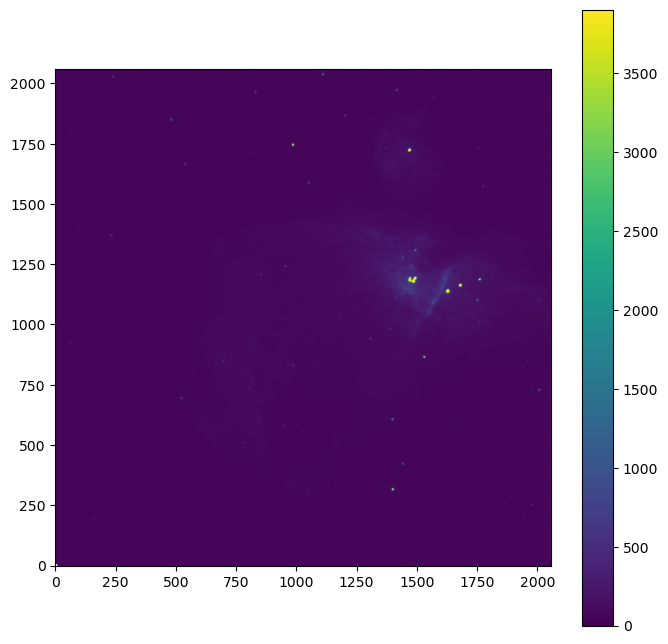

Image shape: (2059, 2058)


In [87]:
imS = imstack

valid_rows = np.any(~np.isnan(imS), axis=1)
valid_cols = np.any(~np.isnan(imS), axis=0)

rmin, rmax = np.where(valid_rows)[0][[0, -1]]
cmin, cmax = np.where(valid_cols)[0][[0, -1]]

trimmed = imS[rmin:rmax+1, cmin:cmax+1]

plt.figure(figsize=(8,8))
plt.imshow(trimmed, origin='lower', vmin = 0, vmax = 3900)
plt.colorbar()
plt.show()

print("Image shape:", trimmed.shape)

In [88]:
save_path = "/Users/wanyan/Desktop/229Data/Aolun/trimmed_S2.fits"

hdu = fits.PrimaryHDU(trimmed)
hdu.writeto(save_path, overwrite=True)

print(f"Saved trimmed image to: {save_path}")

Saved trimmed image to: /Users/wanyan/Desktop/229Data/Aolun/trimmed_S2.fits


#### O III Band

In [100]:
path = '/Users/wanyan/Desktop/229Data/Aolun/raw/O3_reduced/'
dat_path = path + 'O3.txt'

# files we need to do the alignment
sdat = ascii.read(dat_path, delimiter=" ") # reads into astropy table object sdat
sdat

<Table length=5>
     name       xsh   ysh 
    str14      int64 int64
-------------- ----- -----
M42_O3_81.fits     0     0
M42_O3_82.fits    -5     0
M42_O3_83.fits    -7     5
M42_O3_84.fits    -9     9
M42_O3_85.fits   -13     9

In [101]:
# read in the first image
ffile=fits.open(path+sdat['name'][0])

# determine the image size using the shape function
ysz, xsz = ffile[0].data.shape

# compute the shift needed for each image
xshift = sdat['xsh']
yshift = sdat['ysh']

In [102]:
#make an empty array to collect the big, shifted images
data_stack = []

# notice that we start with image 1! image 0 is the reference image and does not need to be shifted
for i in range(1,nfiles):
    #read in the image
    ffile=fits.open(path+sdat['name'][i])
    fdata=ffile[0].data

    # add NaNs around the edge of the image so we can shift the images without the data wrapping around on itself
    bgim = np.pad(fdata, 100, constant_values=np.nan)

    # shift the image -- make sure the x and y axes are correctly mapped!
    shift_im = np.roll(bgim, (xshift[i],yshift[i]), axis=(1,0))

    # add to the data stack
    data_stack.append(shift_im)

# make the data stack into an array so we can do math with it
data_stack = np.array(data_stack)

In [103]:
imstack = np.nanmedian(data_stack, axis=0)

/var/folders/jt/pmnf348x4bq6l0mthmr86gd00000gn/T/ipykernel_9901/1028748614.py:1: RuntimeWarning: All-NaN slice encountered
  imstack = np.nanmedian(data_stack, axis=0)


In [104]:
print("is all NaN? ", np.isnan(imstack).all())
print("fraction NaN:", np.isnan(imstack).mean())
print("min:", np.nanmin(imstack))
print("max:", np.nanmax(imstack))

print("Image shape:", imstack.shape)

is all NaN?  False
fraction NaN: 0.16313472790364864
min: -175.04722977082253
max: 48803.67211339316
Image shape: (2248, 2248)


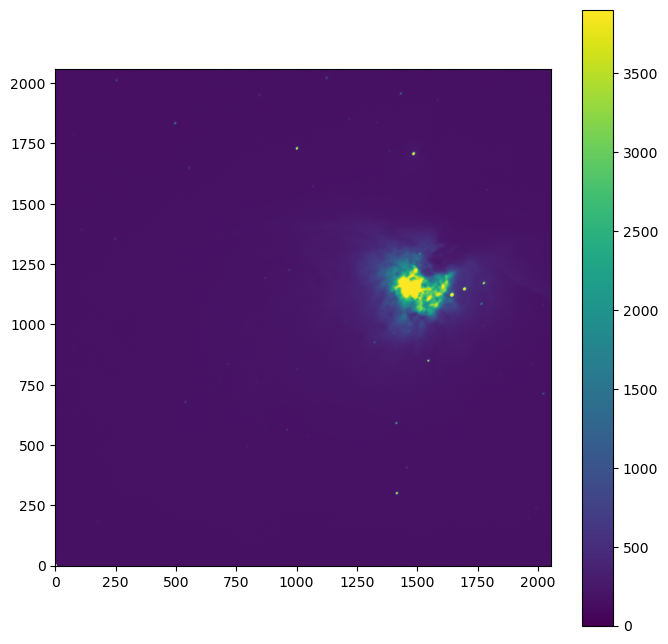

Image shape: (2057, 2056)


In [105]:
imO = imstack

valid_rows = np.any(~np.isnan(imO), axis=1)
valid_cols = np.any(~np.isnan(imO), axis=0)

rmin, rmax = np.where(valid_rows)[0][[0, -1]]
cmin, cmax = np.where(valid_cols)[0][[0, -1]]

trimmed = imO[rmin:rmax+1, cmin:cmax+1]

plt.figure(figsize=(8,8))
plt.imshow(trimmed, origin='lower', vmin = 0, vmax = 3900)
plt.colorbar()
plt.show()

print("Image shape:", trimmed.shape)

In [106]:
save_path = "/Users/wanyan/Desktop/229Data/Aolun/trimmed_O3.fits"

hdu = fits.PrimaryHDU(trimmed)
hdu.writeto(save_path, overwrite=True)

print(f"Saved trimmed image to: {save_path}")

Saved trimmed image to: /Users/wanyan/Desktop/229Data/Aolun/trimmed_O3.fits


### 2.2 Alignment

In [109]:
path = '/Users/wanyan/Desktop/229Data/Aolun/'
dat_path = path + 'Align.txt'

# files we need to do the alignment
sdat = ascii.read(dat_path, delimiter=" ") # reads into astropy table object sdat
sdat

<Table length=3>
      name       xsh   ysh 
     str15      int64 int64
--------------- ----- -----
trimmed_Ha.fits     0     0
trimmed_S2.fits   -17    17
trimmed_O3.fits   -33    32

In [134]:
# read in the first image
ffile=fits.open(path+sdat['name'][0])
ref = ffile[0].data[:2056,:2056]

# determine the image size using the shape function
ysz, xsz = ffile[0].data[:2056,:2056].shape

# compute the shift needed for each image
xshift = sdat['xsh']
yshift = sdat['ysh']

In [138]:
#make an empty array to collect the big, shifted images
data_stack = []

# notice that we start with image 1! image 0 is the reference image and does not need to be shifted
for i in range(0,3):
    #read in the image
    ffile=fits.open(path+sdat['name'][i])
    fdata=ffile[0].data[:2056,:2056]

    # add NaNs around the edge of the image so we can shift the images without the data wrapping around on itself
    bgim = np.pad(fdata, 100, constant_values=np.nan)

    # shift the image -- make sure the x and y axes are correctly mapped!
    shift_im = np.roll(bgim, (xshift[i],yshift[i]), axis=(1,0))

    # add to the data stack
    data_stack.append(shift_im)

# make the data stack into an array so we can do math with it
data_stack = np.array(data_stack)

imstack = np.nanmedian(data_stack, axis=0)

valid_rows = np.any(~np.isnan(imstack), axis=1)
valid_cols = np.any(~np.isnan(imstack), axis=0)

rmin, rmax = np.where(valid_rows)[0][[0, -1]]
cmin, cmax = np.where(valid_cols)[0][[0, -1]]
print("Trim indices:", rmin, rmax, cmin, cmax)


Trim indices: 100 2187 67 2155


/var/folders/jt/pmnf348x4bq6l0mthmr86gd00000gn/T/ipykernel_9901/2212016557.py:22: RuntimeWarning: All-NaN slice encountered
  imstack = np.nanmedian(data_stack, axis=0)


In [139]:

Ha_trim = data_stack[0, rmin:rmax+1, cmin:cmax+1]
S2_trim = data_stack[1, rmin:rmax+1, cmin:cmax+1]
O3_trim = data_stack[2, rmin:rmax+1, cmin:cmax+1]

fits.writeto(base + "Ha_aligned_trimmed.fits", Ha_trim, overwrite=True)
fits.writeto(base + "S2_aligned_trimmed.fits", S2_trim, overwrite=True)
fits.writeto(base + "O3_aligned_trimmed.fits", O3_trim, overwrite=True)
print("Saved:")

Saved:


## Part 3 Three Color Image

In [140]:
pip install aplpy

python(11691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


In [141]:
import aplpy 

In [149]:
f657n_fn = '/Users/wanyan/Desktop/229Data/Ha.fits'
f673n_fn = '/Users/wanyan/Desktop/229Data/S2.fits'
f502n_fn = '/Users/wanyan/Desktop/229Data/O3.fits'

In [150]:
f657n = fits.open(f657n_fn)

In [151]:
print("min =", np.nanmin(data))
print("max =", np.nanmax(data))
print("median =", np.nanmedian(data))
print("percentiles:", 
      np.nanpercentile(data, 1), 
      np.nanpercentile(data, 50), 
      np.nanpercentile(data, 99))
print("shape =", data.shape)

min = -188.52884286887226
max = 48528.41178470416
median = 112.1072387222967
percentiles: 61.89177748028651 112.1072387222967 2354.196057820856
shape = (2088, 2089)


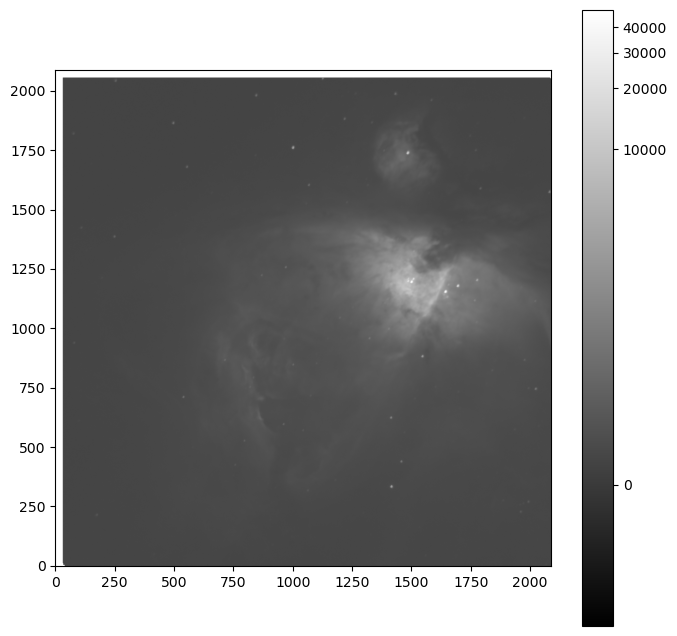

In [152]:
from astropy.visualization import LogStretch, ImageNormalize

norm = ImageNormalize(data, stretch=LogStretch())

plt.figure(figsize=(8,8))
plt.imshow(data, origin='lower', cmap='gray', norm=norm)
plt.colorbar()
plt.show()

In [169]:
# Make a 3D cube with the images in RGB order
aplpy.make_rgb_cube([f673n_fn, f657n_fn, f502n_fn], path+'MM_cube.fits')

# Make an RGB image
aplpy.make_rgb_image(path+'MM_cube.fits', path+'MM_rgb.png')

INFO: Red: [aplpy.rgb]
INFO: vmin =  4.560e+01 (auto) [aplpy.rgb]
INFO: vmax =  4.455e+02 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  6.380e+01 (auto) [aplpy.rgb]
INFO: vmax =  5.399e+03 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  1.543e+02 (auto) [aplpy.rgb]
INFO: vmax =  3.476e+03 (auto) [aplpy.rgb]


In [170]:
# Plot the RGB image using one of the three images to indicate the projection
f = aplpy.FITSFigure(f657n_fn)
f.show_rgb(path+'MM_rgb.png')

In [171]:
# Make an RGB image
aplpy.make_rgb_image(path+'MM_cube.fits', path+'MM_rgb.png',
                     vmin_g=0.25, vmax_r=0.13)

INFO: Red: [aplpy.rgb]
INFO: vmin =  4.554e+01 (auto) [aplpy.rgb]
INFO: vmax =  1.300e-01 [aplpy.rgb]


ValueError: vmin must be less than or equal to vmax

In [ ]:
# Plot the RGB image using one of the three images to indicate the projection
f = aplpy.FITSFigure(f657n_fn)
f.show_rgb(path+'MM_rgb.png')

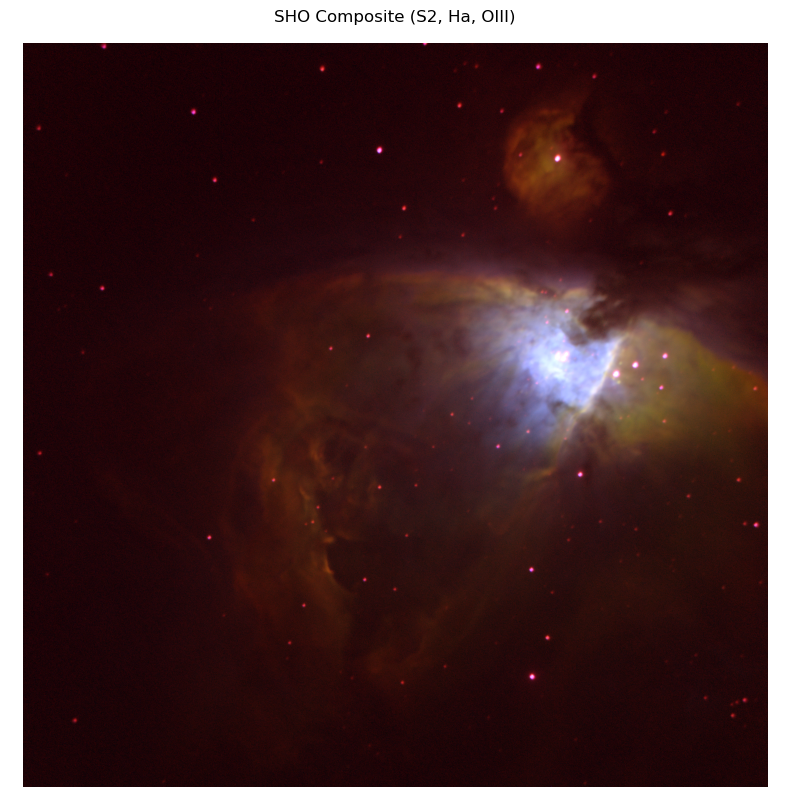

Saved Modified


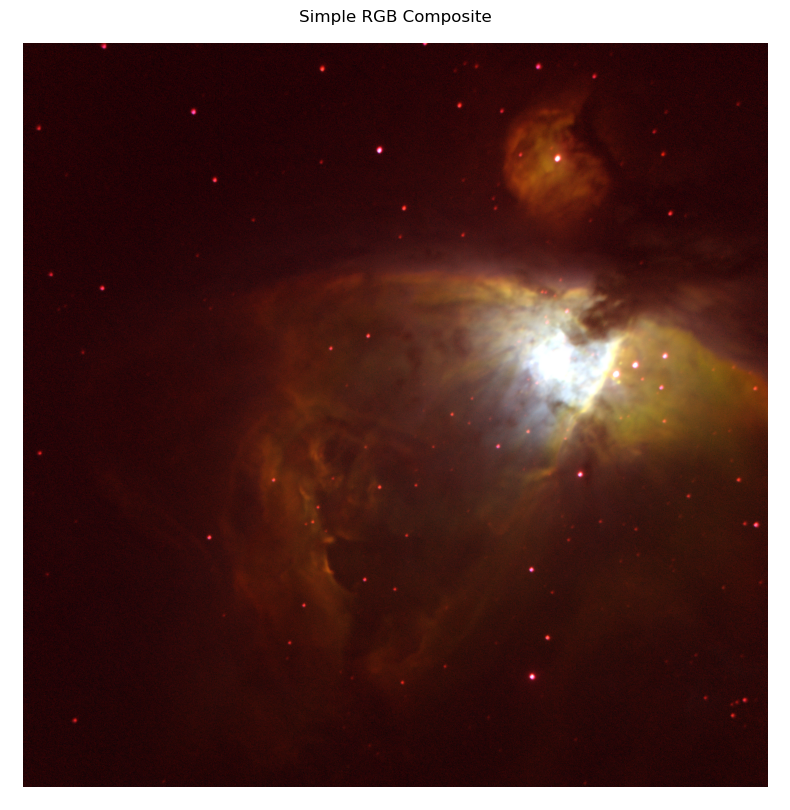

Saved


In [2]:
from astropy.visualization import simple_norm

path_Ha = '/Users/wanyan/Desktop/229Data/Ha.fits'
path_S2 = '/Users/wanyan/Desktop/229Data/S2.fits'
path_O3 = '/Users/wanyan/Desktop/229Data/O3.fits'

Ha = fits.getdata(path_Ha)
S2 = fits.getdata(path_S2)
O3 = fits.getdata(path_O3)

# Reference: https://docs.astropy.org/en/stable/api/astropy.visualization.AsinhStretch.html
def stretch(img, low=1, high=99.7):
    vmin, vmax = np.nanpercentile(img, (low, high))
    norm = simple_norm(img, stretch='asinh', min_cut=vmin, max_cut=vmax)
    return norm(img)

S2_s = stretch(S2)
Ha_s = stretch(Ha)
O3_s = stretch(O3)

# ADJUSTED
R = 0.8 * S2_s     
G = 0.8 * Ha_s      
B = 1.1 * O3_s      

RGB_SHO = np.dstack([
    np.clip(R, 0, 1),
    np.clip(G, 0, 1),
    np.clip(B, 0, 1)
])


# NOT-ADJUSTED
RGB_simple = np.dstack([
    np.clip(S2_s, 0, 1),
    np.clip(Ha_s, 0, 1),
    np.clip(O3_s, 0, 1)
])


# Plot
plt.figure(figsize=(10,10))
plt.imshow(RGB_SHO, origin='lower')
plt.axis('off')
plt.title("SHO Composite (S2, Ha, OIII)")
plt.show()

plt.imsave('/Users/wanyan/Desktop/229Data/SHO.png', RGB_SHO)

print("Saved Modified")


plt.figure(figsize=(10,10))
plt.imshow(RGB_simple, origin='lower')
plt.axis('off')
plt.title("Simple RGB Composite")
plt.show()

plt.imsave('/Users/wanyan/Desktop/229Data/RGB_simple.png', RGB_simple)

print("Saved")

In [79]:
# I choose not to use WCS coordinate because that crops a lot of part of my image, and has a lot of blanks

Saved image to: /Users/wanyan/Desktop/229Data/M42_final.png


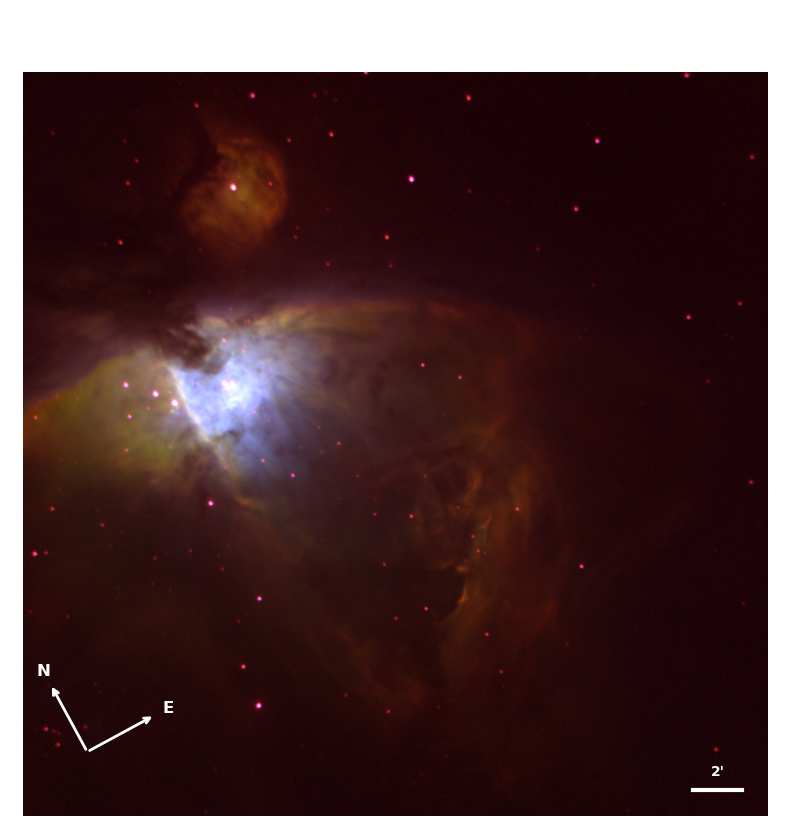

In [9]:
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales


def add_robust_compass(ax, wcs, image_shape, color='white'):
    h, w = image_shape[:2]
    x_start = w * 0.1
    y_start = h * 0.1
    arrow_len = 0.1 * min(h, w) 

    cx, cy = w / 2, h / 2 # the center
    
    ra0, dec0 = wcs.all_pix2world(cx, cy, 1)
    scales = proj_plane_pixel_scales(wcs.celestial)
    offset = scales[1] * 10 

    xn, yn = wcs.all_world2pix(ra0, dec0 + offset, 1)
    xe, ye = wcs.all_world2pix(ra0 + offset/np.cos(np.deg2rad(dec0)), dec0, 1)

    dx_n, dy_n = xn - cx, yn - cy
    dx_e, dy_e = xe - cx, ye - cy
    
    len_n = np.sqrt(dx_n**2 + dy_n**2)
    len_e = np.sqrt(dx_e**2 + dy_e**2)
    
    vn_x, vn_y = (dx_n / len_n) * arrow_len, (dy_n / len_n) * arrow_len
    ve_x, ve_y = (dx_e / len_e) * arrow_len, (dy_e / len_e) * arrow_len

    ax.annotate("", xy=(x_start + vn_x, y_start + vn_y), xytext=(x_start, y_start),
                arrowprops=dict(arrowstyle="->", color=color, lw=2))
    ax.text(x_start + vn_x * 1.2, y_start + vn_y * 1.2, 'N', 
            color=color, ha='center', va='center', weight='bold', fontsize=12)

    ax.annotate("", xy=(x_start + ve_x, y_start + ve_y), xytext=(x_start, y_start),
                arrowprops=dict(arrowstyle="->", color=color, lw=2))
    ax.text(x_start + ve_x * 1.2, y_start + ve_y * 1.2, 'E', 
            color=color, ha='center', va='center', weight='bold', fontsize=12)

    # Scale Bar
    deg_per_pix = scales[0]
    bar_arcmin = 2 
    bar_pix = (bar_arcmin * 60) / (deg_per_pix * 3600)
    
    bx_start = w - bar_pix - (w*0.05)
    by_start = h * 0.05
    ax.plot([bx_start, bx_start + bar_pix], [by_start, by_start], color=color, lw=3)
    ax.text(bx_start + bar_pix/2, by_start + (h*0.02), f"{bar_arcmin}'", 
            color=color, ha='center', weight='bold')

# Plot 
with fits.open(path_Ha) as hdul:
    header = hdul[0].header
    wcs = WCS(header)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.fliplr(RGB_SHO), origin='lower')
ax.axis('off')
ax.set_title("M42 Three Color Image", fontsize=20, color='white', pad=20)

add_robust_compass(ax, wcs, RGB_SHO.shape)

save_path = "/Users/wanyan/Desktop/229Data/M42_final.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='black')
print("Saved image to:", save_path)

plt.show()